# Part A
## Import Libraries and Dataset

In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('clinical_dataset.csv', delimiter=';')
print(df.shape)
df.head()

(540, 55)


,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,Non frail,F,75,0,0,No,Sees moderately,Hears well,No,...,3 - About the same,4.2,> 2 h and < 5 h per week,Never smoked,1.0,6.0,31.0,5,0,5
1,1002,Pre-frail,M,73,0,1,No,Sees moderately,Hears moderately,No,...,2 - A little worse,3.3,> 2 h and < 5 h per week,Never smoked,14.0,6.0,26.0,12,0,4
2,1003,Pre-frail,M,72,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,3.4,< 2 h per week,Past smoker (stopped at least 6 months),21.0,6.0,26.0,9,0,3
3,1004,Frail,F,88,0,0,No,Sees moderately,Hears moderately,No,...,3 - About the same,7.3,< 2 h per week,Never smoked,21.0,5.5,20.0,11,0,8
4,1005,Pre-frail,F,83,0,4,Yes,Sees moderately,Hears poorly,No,...,3 - About the same,3.0,> 5 h per week,Current smoker,0.0,6.0,30.0,12,0,4


## 1 ) Preprocessing
### 1.1 ) Categorical to Numerical

In [26]:
# The factorization method makes the conversion a lot faster in stark contrast to map, or replace techniques.
categorical_columns = ['fried', 'gender','vision','audition','balance_single','gait_optional_binary','sleep','health_rate','health_rate_comparison','activity_regular','smoking']
df[categorical_columns] = df[categorical_columns].apply(lambda x: pd.factorize(x,sort=False, na_sentinel=None)[0])
df.replace(to_replace="Yes", value=1, inplace=True)
df.replace(to_replace="No", value=0, inplace=True)
df.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001,0,0,75,0,0,0,0,0,0.0,...,0,4.2,0,0,1.0,6.0,31.0,5,0,5
1,1002,1,1,73,0,1,0,0,1,0.0,...,1,3.3,0,0,14.0,6.0,26.0,12,0,4
2,1003,1,1,72,0,0,0,0,1,0.0,...,0,3.4,1,1,21.0,6.0,26.0,9,0,3
3,1004,2,0,88,0,0,0,0,1,0.0,...,0,7.3,1,0,21.0,5.5,20.0,11,0,8
4,1005,1,0,83,0,4,1,0,2,0.0,...,0,3.0,2,2,0.0,6.0,30.0,12,0,4


### 1.2.1 ) Remove Erroneous Values

In [27]:
# Remove rows from the 5 parameters of fried, that contain NaN values
df.dropna(subset=['weight_loss'])
df = df[df['gait_speed_slower'] != "Test not adequate"]
df = df.replace ({'test non realizable': np.nan})
df = df.replace ({999 : np.nan})
df.loc[(df['bmi_score'] > 50), 'bmi_score']=np.nan
df.loc[(df['lean_body_mass'] < 0), 'lean_body_mass']=np.nan

df.head()

,part_id,fried,gender,age,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,vision,audition,weight_loss,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1001.0,0,0,75.0,0.0,0.0,0.0,0,0,0.0,...,0,4.2,0,0,1.0,6.0,31.0,5.0,0.0,5.0
1,1002.0,1,1,73.0,0.0,1.0,0.0,0,1,0.0,...,1,3.3,0,0,14.0,6.0,26.0,12.0,0.0,4.0
2,1003.0,1,1,72.0,0.0,0.0,0.0,0,1,0.0,...,0,3.4,1,1,21.0,6.0,26.0,9.0,0.0,3.0
3,1004.0,2,0,88.0,0.0,0.0,0.0,0,1,0.0,...,0,7.3,1,0,21.0,5.5,20.0,11.0,0.0,8.0
4,1005.0,1,0,83.0,0.0,4.0,1.0,0,2,0.0,...,0,3.0,2,2,0.0,6.0,30.0,12.0,0.0,4.0


### 1.2.2 ) Remove rows with 25% NaN, and columns with 30% NaN

In [28]:
#   Rows with NaN percentage > 10%
row_nan_mean = df.isnull().mean(axis=1)
r = row_nan_mean > 0.25
row_remove = df.loc[r, :]
df.drop(row_remove.index, axis = 0, inplace = True)

#   Columns with NaN percentage > 15%
col_nan_mean = df.isnull().mean()
c = col_nan_mean > 0.3
col_removed = df.loc[:, c]
df.drop(col_removed , axis=1, inplace=True)

df.fillna(df.mean().astype(int), inplace=True)

### 1.2.3 ) Visualize outliers with boxplot

Text(0.5, 1.0, 'comorbidities_count')

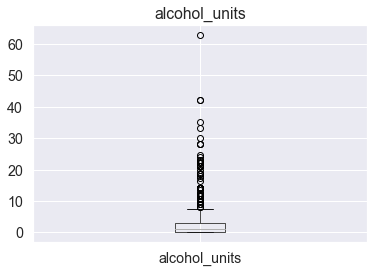

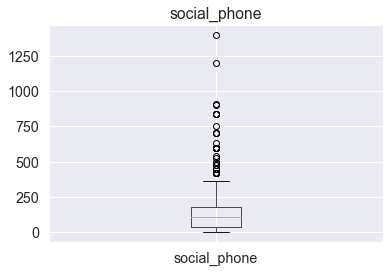

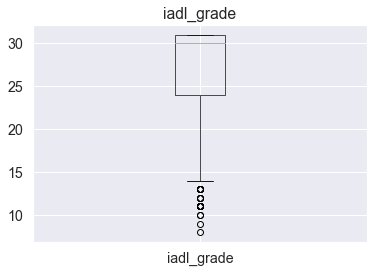

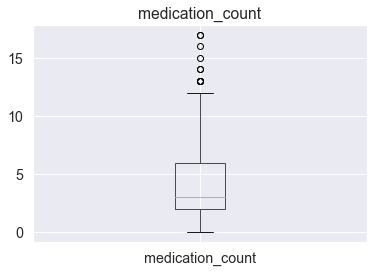

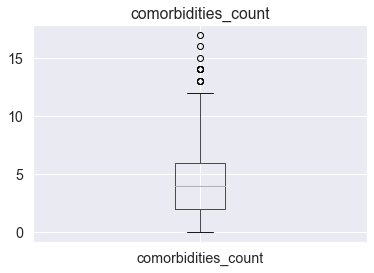

In [29]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column=['alcohol_units'])
plt.title("alcohol_units")

plt.figure()
df.boxplot(column=["social_phone"])
plt.title("social_phone")

plt.figure()
df.boxplot(column=["iadl_grade"])
plt.title("iadl_grade")

plt.figure()
df.boxplot(column=["medication_count"])
plt.title("medication_count")

plt.figure()
df.boxplot(column=["comorbidities_count"])
plt.title("comorbidities_count")

### 1.3 ) Handle Missing Values

#### Outlier Detection using Tukey IQR and replace with mean

In [30]:
Q1 = df.quantile()
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

for i in df:
    mean = df[i].mean().astype(int)
    if mean != 0:
        df[i] = df[i].mask(df[i] > upper[i], mean)
        df[i] = df[i].mask(df[i] < lower[i], mean)

df.to_csv('preprocessed_clinical.csv', index=False)

## 2 ) Classification

### 2.1 ) Drop the parameters that generate the fried categorization(and part_id)

In [31]:
X = df.drop(['part_id', 'fried', 'weight_loss', 'exhaustion_score', 'gait_speed_slower',
                'grip_strength_abnormal', 'low_physical_activity'], axis=1)
y = df['fried']

### 2.2 ) Create Training and Test Sets and Apply Scaling

In [32]:
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

Accuracy of Logistic Regression classifier on training set: 0.73
Accuracy of Logistic Regression classifier on test set: 0.59

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        66
           1       0.58      0.56      0.57        68
           2       0.40      0.37      0.38        27

    accuracy                           0.59       161
   macro avg       0.55      0.55      0.55       161
weighted avg       0.59      0.59      0.59       161



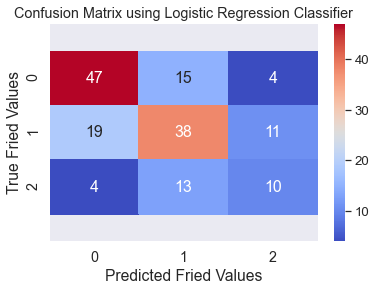

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver= "liblinear", max_iter=5000)
logreg.fit(X_train, y_train)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}\n'.format(logreg.score(X_test, y_test)))
y_pred = logreg.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_logreg = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_logreg, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion Matrix')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using Logistic Regression Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Decision Tree

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.54

              precision    recall  f1-score   support

           0       0.61      0.64      0.62        66
           1       0.53      0.43      0.47        68
           2       0.43      0.59      0.50        27

    accuracy                           0.54       161
   macro avg       0.52      0.55      0.53       161
weighted avg       0.54      0.54      0.54       161



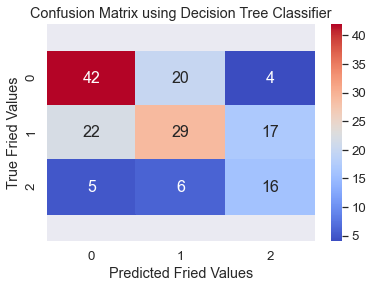

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}\n'.format(clf.score(X_test, y_test)))
y_pred = clf.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_clf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_clf, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion Matrix')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using Decision Tree Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### K-Nearest Neighbors


Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.50

              precision    recall  f1-score   support

           0       0.54      0.56      0.55        66
           1       0.47      0.53      0.50        68
           2       0.50      0.30      0.37        27

    accuracy                           0.50       161
   macro avg       0.50      0.46      0.47       161
weighted avg       0.50      0.50      0.50       161



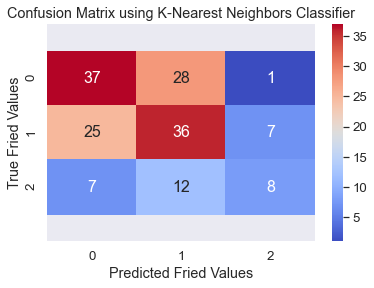

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}\n'.format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_knn = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_knn, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion Matrix')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using K-Nearest Neighbors Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Gaussian Naive Bayes

Accuracy of Gaussian Naive Bayes classifier on training set: 0.65
Accuracy of Gaussian Naive Bayes classifier on test set: 0.59

              precision    recall  f1-score   support

           0       0.64      0.74      0.69        66
           1       0.54      0.51      0.53        68
           2       0.58      0.41      0.48        27

    accuracy                           0.59       161
   macro avg       0.58      0.55      0.56       161
weighted avg       0.59      0.59      0.58       161



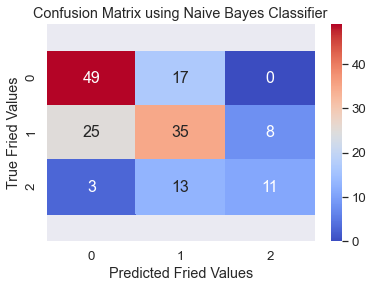

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of Gaussian Naive Bayes classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of Gaussian Naive Bayes classifier on test set: {:.2f}\n'.format(gnb.score(X_test, y_test)))
y_pred = gnb.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_gnb = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_gnb, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion matrix of the classifier')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using Naive Bayes Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Support Vector Machine

Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.63

              precision    recall  f1-score   support

           0       0.72      0.64      0.68        66
           1       0.56      0.74      0.63        68
           2       0.69      0.33      0.45        27

    accuracy                           0.63       161
   macro avg       0.66      0.57      0.59       161
weighted avg       0.65      0.63      0.62       161



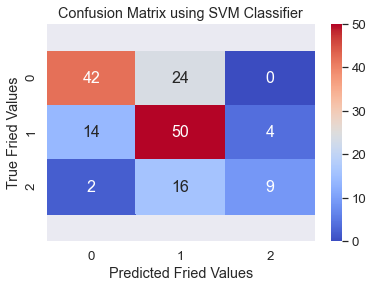

In [37]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}\n'.format(svm.score(X_test, y_test)))

y_pred = svm.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_svc = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_svc, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.2)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion matrix of the classifier')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using SVM Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Random Forest

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.65

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        66
           1       0.58      0.66      0.62        68
           2       0.83      0.37      0.51        27

    accuracy                           0.65       161
   macro avg       0.70      0.60      0.62       161
weighted avg       0.67      0.65      0.65       161



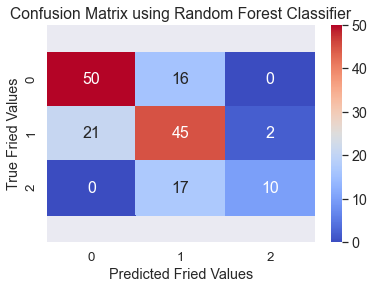

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = clf=RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}\n'.format(rf.score(X_test, y_test)))
y_pred = rf.predict(X_test)

# Evaluation of the Algorithm
confusion_matrix_rf = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred))

# Plot of the confusion matrix to a heatmap
df_cm = pd.DataFrame(confusion_matrix_rf, range(3), range(3))
ax= plt.subplot()
sns.set(font_scale=1.3)
sns.heatmap(df_cm, cmap="coolwarm", annot=True, annot_kws={"size": 16}, ax = ax)
plt.title('Confusion Matrix')
ax.set_xlabel('Predicted Fried Values')
ax.set_ylabel('True Fried Values')
ax.set_title('Confusion Matrix using Random Forest Classifier')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()